In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = "./data/videos/taiwan_pedestrians.mp4"

In [3]:
cap = cv2.VideoCapture(path)
ret, frame = cap.read()
cap.release()

In [4]:
frame.shape

(360, 640, 3)

In [5]:
%matplotlib qt
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
# 344, 31       437, 30
# 345, 62       442, 62

# 164,  0       467,  0 
# 74, 334       591,334
[[164,  0],[467,  0],[74, 334],[591,334]]

In [20]:
def getWarpingMatrix(pts1=None, pts2=None, forward = True):
    """
    Returns warping matrix according to the datapoints
    """
    if not pts1:
        pts1 = np.float32([[164,  0],[467,  0],[74, 334],[591,334]])
    else:
        pts1 = np.float32(pts1)
    if not pts2: 
        pts2 = np.float32([[500, 0], [1000, 0], [500, 500], [1000, 500]])
    else:
        pts2 = np.float32(pts2)

    if forward:
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
    else:
        matrix = cv2.getPerspectiveTransform(pts2, pts1)

    return matrix

def warpPerspective(image, matrix, forward = True, shape = None):
    """
    Warps the perspective in an image 
    according to the warping matrix
    """
    if not shape:
        if forward:
            out_shape = (1500, 600)
        else:
            out_shape = (1920, 1080)
    else:
        out_shape = shape
        
    result = cv2.warpPerspective(image, matrix, out_shape, flags = cv2.INTER_LINEAR)
    return result

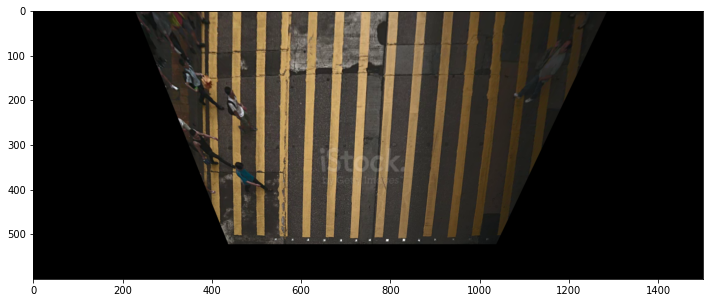

In [21]:
pts = [[164,  0],[467,  0],[74, 334],[591,334]]
mat = getWarpingMatrix()
warped = warpPerspective(frame, mat)
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

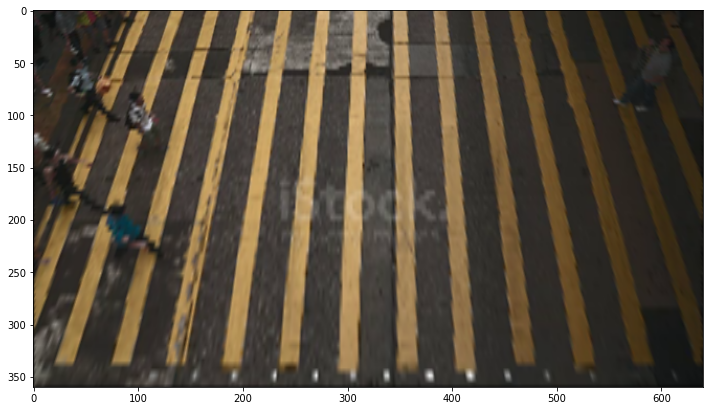

In [10]:
matInv = getWarpingMatrix(forward=False)
unWarpedImage = warpPerspective(warped, matInv, forward=False, shape=(640, 360))
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(unWarpedImage, cv2.COLOR_BGR2RGB))